In [1]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import getpass

In [5]:
my_user = "xyzzz" #change user_name
my_pass=getpass.getpass() #password of the user

········


In [6]:
search_item="Virat kohli"

In [7]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [8]:
driver = webdriver.Chrome()
driver.get("https://twitter.com/i/flow/login")

In [13]:
#driver.quit()

In [9]:
user_id = driver.find_element(By.XPATH,"//input[@type='text']")
user_id.send_keys(my_user)
user_id.send_keys(Keys.ENTER)


In [11]:
password = driver.find_element(By.XPATH,"//input[@type='password']")
password.send_keys(my_pass)
password.send_keys(Keys.ENTER)

In [12]:
search_box = driver.find_element(By.XPATH,"//input[@data-testid='SearchBox_Search_Input']")
search_box.send_keys(search_item)
search_box.send_keys(Keys.ENTER)

In [14]:
#Scraping tweets
all_tweets=set()

tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
while True:
    for tweet in tweets:
        all_tweets.add(tweet.text)
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    sleep(3)
    tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
    if len(all_tweets)>50:
        break

In [15]:
all_tweets = list(all_tweets)
all_tweets[0]

'Tears of joy!! What a team, what a final!! Congratulations & tku #TeamIndia  \n@ImRo45\n legend!! Bumrah, Arshdeep, Hardik on fire! And tku #KingKohli for all you have done for t20 cricket. You deserve this more than anyone! #RohitSharma𓃵 #ViratKohli𓃵 #bumrah #T20IWorldCup'

In [16]:
#cleaning tweets
import pandas as pd
pd.options.display.max_colwidth = 1000
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to C:\Users\Kavana N
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Kavana N
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
stp_words = stopwords.words('english')
print(stp_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
df = pd.DataFrame(all_tweets,columns=['tweets'])
df.head()

,tweets
0,"Tears of joy!! What a team, what a final!! Congratulations & tku #TeamIndia \n@ImRo45\n legend!! Bumrah, Arshdeep, Hardik on fire! And tku #KingKohli for all you have done for t20 cricket. You deserve this more than anyone! #RohitSharma𓃵 #ViratKohli𓃵 #bumrah #T20IWorldCup"
1,These Twitter trolls for few failures shouldn't distract you from the fact that Virat Kohli pulled off the greatest comeback after his lean phase.
2,जबतक अपुन है... टेंशन नई लेने का भाईलोग\n\n#T20WorldCup #ViratKohli\n#RohitSharma𓃵 #HardikPandya\n#TeamIndia #Bumrah #ViratKohli𓃵
3,Virat Kohli In T20I WCs over the years..
4,Somebody have edited for #RohiRat #RoKo #T20WorldCup #RohitSharma #ViratKohli\n#Retirement


In [19]:
one_tweet=df.iloc[4]['tweets']
one_tweet

'Somebody have edited for #RohiRat #RoKo #T20WorldCup #RohitSharma #ViratKohli\n#Retirement'

In [20]:

from textblob import TextBlob
from wordcloud import WordCloud

def TweetCleaning(tweet):
    cleanTweet = re.sub(r"@[a-zA-Z0-9]+","",tweet)
    cleanTweet = re.sub(r"#[a-zA-Z0-9\s]+","",cleanTweet)
    cleanTweet = ' '.join(word for word in cleanTweet.split() if word not in stp_words)
    return cleanTweet

def calPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def calSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(tweet):
    if tweet > 0:
        return "positive"
    if tweet == 0:
        return "neutral"
    else:
        return "negative"


In [21]:
df.shape

(53, 1)

In [22]:
df['cleanedTweets'] = df['tweets'].apply(TweetCleaning)
df['tPolarity'] = df['cleanedTweets'].apply(calPolarity)
df['tSubjectivity'] = df['cleanedTweets'].apply(calSubjectivity)
df['segmentation'] = df['tPolarity'].apply(segmentation)
df.head()

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
0,"Tears of joy!! What a team, what a final!! Congratulations & tku #TeamIndia \n@ImRo45\n legend!! Bumrah, Arshdeep, Hardik on fire! And tku #KingKohli for all you have done for t20 cricket. You deserve this more than anyone! #RohitSharma𓃵 #ViratKohli𓃵 #bumrah #T20IWorldCup","Tears joy!! What team, final!! Congratulations & tku !! Bumrah, Arshdeep, Hardik fire! And tku . You deserve anyone! 𓃵 𓃵",0.5,0.6,positive
1,These Twitter trolls for few failures shouldn't distract you from the fact that Virat Kohli pulled off the greatest comeback after his lean phase.,These Twitter trolls failures distract fact Virat Kohli pulled greatest comeback lean phase.,1.0,1.0,positive
2,जबतक अपुन है... टेंशन नई लेने का भाईलोग\n\n#T20WorldCup #ViratKohli\n#RohitSharma𓃵 #HardikPandya\n#TeamIndia #Bumrah #ViratKohli𓃵,जबतक अपुन है... टेंशन नई लेने का भाईलोग 𓃵 𓃵,0.0,0.0,neutral
3,Virat Kohli In T20I WCs over the years..,Virat Kohli In T20I WCs years..,0.0,0.0,neutral
4,Somebody have edited for #RohiRat #RoKo #T20WorldCup #RohitSharma #ViratKohli\n#Retirement,Somebody edited,0.0,0.0,neutral


In [23]:
#Analysing  and visualisation
df.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})

,segmentation
segmentation,
negative,5
neutral,35
positive,13


In [24]:
#top 3 positive
df.sort_values(by=['tPolarity'],ascending=False).head(3)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
1,These Twitter trolls for few failures shouldn't distract you from the fact that Virat Kohli pulled off the greatest comeback after his lean phase.,These Twitter trolls failures distract fact Virat Kohli pulled greatest comeback lean phase.,1.0,1.00,positive
17,- Virat Kohli retired from T20Is.\n- Rohit Sharma retired from T20Is.\n\nBoth have won T20 World Cup and both retired together - WHAT A GREAT FAREWELL OF THESE TWO GOATS.,- Virat Kohli retired T20Is. - Rohit Sharma retired T20Is. Both T20 World Cup retired together - WHAT A GREAT FAREWELL OF THESE TWO GOATS.,0.8,0.75,positive
7,Happy birthday brother \n@imVkohli\n to king in India sir \n@sachin_rt\n Virat kohli \n@BCCI,Happy birthday brother king India sir _rt Virat kohli,0.8,1.00,positive


In [25]:
#top 3 negative
df.sort_values(by=['tPolarity'],ascending=True).head(3)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
32,Just one bad T20 World Cup for Virat Kohli and people forgot that Virat Kohli carried this team in every T20 WC being Highest Scorer in 3 Tournaments and 2 times ICC POTT!!!!.....,Just one bad T20 World Cup Virat Kohli people forgot Virat Kohli carried team every T20 WC Highest Scorer 3 Tournaments 2 times ICC POTT!!!!.....,-1.000000,0.666667,negative
35,I love Virat Kohli. I don’t mind seeing him scoring that hundred as we were badly losing anyway. \n\nBut Richard Kettleborough set an awful example here. It is nothing new that the bowlers try the ‘ugly’ way to restrict a batsman’s hundred. There is no rule that states that a,I love Virat Kohli. I don’t mind seeing scoring hundred badly losing anyway. But Richard Kettleborough set awful example here. It nothing new bowlers try ‘ugly’ way restrict batsman’s hundred. There rule states,-0.352727,0.744242,negative
15,"Hearing funny arguments about Virat Kohli being Selfish and obsessed with personal milestone.\nYes Kohli is selfish, selfish enough to follow the dream of a billion people, selfish enough to strive for excellence even after achieving so much, selfish enough to set new benchmarks,","Hearing funny arguments Virat Kohli Selfish obsessed personal milestone. Yes Kohli selfish, selfish enough follow dream billion people, selfish enough strive excellence even achieving much, selfish enough set new benchmarks,",-0.217803,0.771212,negative


In [26]:
df[df.tPolarity==0]

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
2,जबतक अपुन है... टेंशन नई लेने का भाईलोग\n\n#T20WorldCup #ViratKohli\n#RohitSharma𓃵 #HardikPandya\n#TeamIndia #Bumrah #ViratKohli𓃵,जबतक अपुन है... टेंशन नई लेने का भाईलोग 𓃵 𓃵,0.0,0.00,neutral
3,Virat Kohli In T20I WCs over the years..,Virat Kohli In T20I WCs years..,0.0,0.00,neutral
4,Somebody have edited for #RohiRat #RoKo #T20WorldCup #RohitSharma #ViratKohli\n#Retirement,Somebody edited,0.0,0.00,neutral
5,WHAT. A. KNOCK \n\nVirat Kohli departs after a marvellous 95(104) \n\n#TeamIndia | #CWC23 | #MenInBlue | #INDvNZ,WHAT. A. KNOCK Virat Kohli departs marvellous 95(104) | | |,0.0,0.00,neutral
8,T20 உலக கோப்பையை சனாதனம் வென்றது \n\n#IndiaWon #Bumra #Pandya #JaspritBumra #ViratKohli𓃵 #T20WorldCup #T20WorldCup2024 #T20WorldCupFinal #INDvSA #INDvsSA2024 #AxarPatel,T20 உலக கோப்பையை சனாதனம் வென்றது 𓃵,0.0,0.00,neutral
9,Rohit Sharma & Virat Kohli,Rohit Sharma & Virat Kohli,0.0,0.00,neutral
10,"फिर से होगा वर्ल्डकप फाइनल, लीक हुआ था मैच\n\n#T20WorldCup | #RohitSharma | #ViratKohli","फिर से होगा वर्ल्डकप फाइनल, लीक हुआ था मैच | |",0.0,0.00,neutral
11,Virat Kohli has completed cricket,Virat Kohli completed cricket,0.0,0.00,neutral
13,Head Coach Rahul Dravid Backs Virat Kohli,Head Coach Rahul Dravid Backs Virat Kohli,0.0,0.00,neutral
14,"The way Virat Kohli looked up to the sky and said, ""God's plan, baby""","The way Virat Kohli looked sky said, ""God's plan, baby""",0.0,0.00,neutral


In [31]:
import seaborn as sns

In [32]:
df.groupby('segmentation').count()

,tweets,cleanedTweets,tPolarity,tSubjectivity
segmentation,,,,
negative,5,5,5,5
neutral,35,35,35,35
positive,13,13,13,13


<AxesSubplot:xlabel='tPolarity', ylabel='tSubjectivity'>

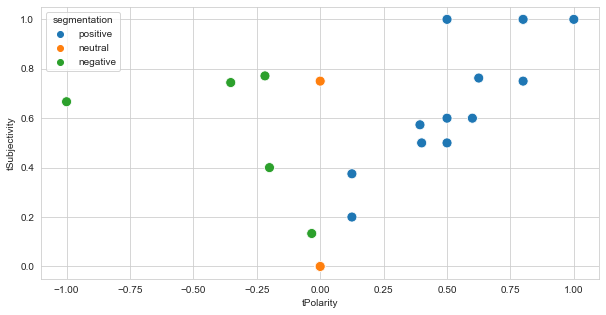

In [33]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.scatterplot(data=df, x='tPolarity',y='tSubjectivity',s=100,hue='segmentation')

<AxesSubplot:xlabel='segmentation', ylabel='count'>

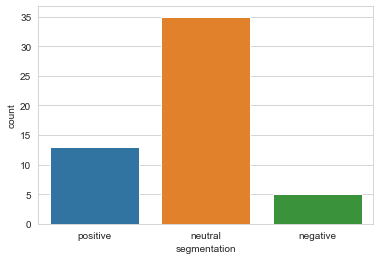

In [34]:
sns.countplot(data=df,x='segmentation')


In [35]:
positive = round(len(df[df.segmentation == 'positive'])/len(df)*100,1)
negative = round(len(df[df.segmentation == 'negative'])/len(df)*100,1)
neutral = round(len(df[df.segmentation == 'neutral'])/len(df)*100,1)

responses = [positive, negative, neutral]
responses

response = {'resp': ['mayWin', 'mayLoose', 'notSure'], 'pct':[positive, negative, neutral]}
pd.DataFrame(response)

,resp,pct
0,mayWin,24.5
1,mayLoose,9.4
2,notSure,66.0
